In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from sklearn.metrics import accuracy_score
np.set_printoptions(precision=5)#show 5 number after decimal point 

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [4]:
print("X_train.shape :" ,X_train.shape)
print("y_train.shape :", y_train.shape)
print ("X_test.shape :" , X_test.shape)
print("y_test.shape :", y_test.shape)

X_train.shape : (60000, 28, 28)
y_train.shape : (60000,)
X_test.shape : (10000, 28, 28)
y_test.shape : (10000,)


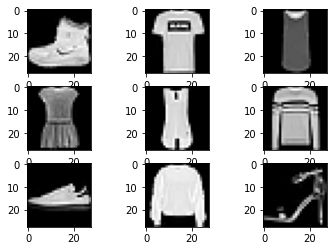

In [5]:
for i in range(9):
    plt.subplot(331 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
X_train = X_train.reshape(60000,28*28)
X_test = X_test.reshape(10000, 28*28)

In [8]:
print("X_train.shape :" ,X_train.shape)
print("y_train.shape :", y_train.shape)
print ("X_test.shape :" , X_test.shape)
print("y_test.shape :", y_test.shape)

X_train.shape : (60000, 784)
y_train.shape : (60000,)
X_test.shape : (10000, 784)
y_test.shape : (10000,)


In [9]:
#Check that we have balnced data
unique, counts = np.unique(y_train, return_counts=True)
print("y_train :", dict(zip(unique, counts)))

unique, counts = np.unique(y_test, return_counts=True)
print("y_test :", dict(zip(unique, counts)))

y_train : {0: 6000, 1: 6000, 2: 6000, 3: 6000, 4: 6000, 5: 6000, 6: 6000, 7: 6000, 8: 6000, 9: 6000}
y_test : {0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}


##  Models:

We will try several models and in the end we will decide which is the best model.<br>
We will try the following models:
* Random Forest
* KNN

In [10]:
from sklearn.model_selection import train_test_split

#split the train
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.1, random_state=42)

In [11]:
# Before we try real models, we will try a dummyClassifier. we will try to get high score than the dummyModel.
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)
print("The DummyClassifier score is:" ,accuracy_score(y_pred,y_test))

The DummyClassifier score is: 0.1


In [12]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score

#### KNN :

In [26]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier().fit(X_train, y_train)
y_pred = KNN.predict(X_val)
accuracy = metrics.accuracy_score(y_val, y_pred)
print("Accuracy:", round(accuracy,3))

Accuracy: 0.853


In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

scores = []
for i in range(250,360,10):
    X_new = SelectKBest(chi2, k=i).fit_transform(X_train, y_train)
    X_train_new, X_val_new, y_train_new, y_val_new = train_test_split(X_new,y_train, test_size=0.1, random_state=42)
    KNN = KNeighborsClassifier().fit(X_train_new, y_train_new)
    y_pred = KNN.predict(X_val_new)
    accuracy = round(metrics.accuracy_score(y_val_new, y_pred),3)
    print("number of features : ", i, ", Accuracy:", accuracy)
    scores.append(accuracy)

number of features :  250 , Accuracy: 0.842
number of features :  260 , Accuracy: 0.841
number of features :  270 , Accuracy: 0.841
number of features :  280 , Accuracy: 0.843
number of features :  290 , Accuracy: 0.843
number of features :  300 , Accuracy: 0.845
number of features :  310 , Accuracy: 0.845
number of features :  320 , Accuracy: 0.845
number of features :  330 , Accuracy: 0.848
number of features :  340 , Accuracy: 0.849
number of features :  350 , Accuracy: 0.85


In [28]:
### best accuracy with 350 features.

In [29]:
X_train = SelectKBest(chi2, k=350).fit_transform(X_train, y_train)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.1, random_state=42)

#### RandomForest :

In [30]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state=42).fit(X_train, y_train)
y_pred = RF.predict(X_val)
accuracy = metrics.accuracy_score(y_val, y_pred)
print("Accuracy:", round(accuracy,3))

Accuracy: 0.87


#### XGBoost : 

In [31]:
%%time
from xgboost import XGBClassifier

XGB = XGBClassifier(objective="multi:softprob",num_class=10).fit(X_train, y_train,eval_metric='auc')
y_pred = XGB.predict(X_val)      
accuracy = metrics.accuracy_score(y_val, y_pred)
print("Accuracy:", round(accuracy,3))

Accuracy: 0.891
CPU times: total: 22min 24s
Wall time: 3min 9s


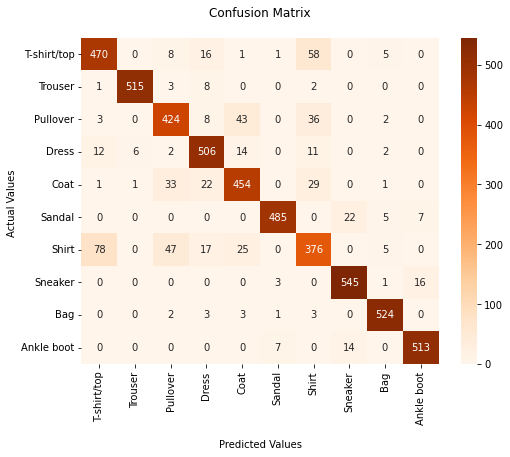

In [32]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_val, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Oranges')
ax.set_title('Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"],rotation=90)
ax.yaxis.set_ticklabels(["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"],rotation=0)

plt.show()

Text(0.5, 0, 'XGB Feature Importance')

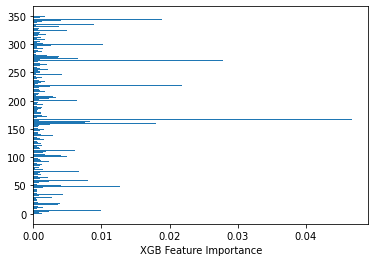

In [34]:
sorted_idx = XGB.feature_importances_.argsort()
plt.barh(sorted_idx,XGB.feature_importances_[sorted_idx])
plt.xlabel("XGB Feature Importance")

In [35]:
#Searching for better performance out of the models with RandomizedSearch
from sklearn.model_selection import RandomizedSearchCV

In [37]:
#XGBClassifier

parameters = {
        'learning_rate': [ 0.1,0.3,0.03],
        'max_depth': [4,5,6],
        'min_child_weight': [1, 2],
        'subsample': [0.5,0.6,1],
        'colsample_bytree': [0.3,0.5, 0.7],
        'n_estimators' : [100,150,170,200]
         }

random_XGB = RandomizedSearchCV(XGBClassifier(),parameters, verbose=True, n_jobs=-1, 
                          cv=3,random_state=3, n_iter = 2, return_train_score=True)
random_XGB.fit(X_train,y_train, eval_metric='auc')
y_pred_XGB_random = random_XGB.predict(X_val)
print ("Accuracy Score = ",metrics.accuracy_score(y_val,y_pred_XGB_random))
print (random_XGB.best_params_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Accuracy Score =  0.8853703703703704
{'subsample': 0.5, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.5}


In [19]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

pca = PCA(n_components=0.9)
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)